# Machine Learning Model: XGBoost 

### Background 

The following notebook seeks to apply an XGBoost gradient boosting model based on random oversampled (ROS) and SMOTE data to determine a predictive model. The results will then be evaluated based on the following metrics; 

1. Balanced Accuracy Score & Accuracy Score
2. Confusion Matrix
3. Classification Report 
4. F-Beta Score
5. ROC - AUC
6. Feature Importance 

### Objective 

The purpose is to evaluate the machine learning model's predictive capabilities in regards to determining the likelihood account holders of a financial insitution would be to take out a personal loan. Additionally, the models performance will be measured against two other machine learning algorithms; Logistic Regression and Random Forest Classifier. 

---


## Initial Imports & Dependencies

In [1]:
# Importing Libraries & Dependencies
from pathlib import Path
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import Machine Learning Model: GXBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

In [3]:
# Import SK-LEARN libraries 
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, fbeta_score

In [4]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

---

## Load Datasets

In [5]:
# Import SMOTE & Random Over Sampled dataset Features
# To import the X_train_smote, X_train_ros, X_train_scaled, X_test_scaled
X_train_smote = np.loadtxt('resources/X_train_smote.csv', delimiter=',')
X_train_ros = np.loadtxt('resources/X_train_ros.csv', delimiter=',')
X_train_scaled = np.loadtxt('resources/X_train_scaled.csv', delimiter=',')
X_test_scaled = np.loadtxt('resources/X_test_scaled.csv', delimiter=',')

# Import SMOTE & Random Over Sampled dataset Traget
# To import y_train_smote, y_train_ros
y_train_smote = pd.read_csv('resources/y_train_smote.csv', sep=',', header=0, squeeze=True)
y_train_ros = pd.read_csv('resources/y_train_ros.csv', sep=',', header=0, squeeze=True)

# Import raw target dataset
# To import y_train, y_test
y_train = pd.read_csv('resources/y_train.csv', sep=',', header=0, squeeze=True, index_col=0)
y_test = pd.read_csv('resources/y_test.csv', sep=',', header=0, squeeze=True, index_col=0)


# Importing feature headers
features = pd.read_csv('resources/features.csv').drop(columns='Unnamed: 0')

In [6]:
# Test dataset import
# Display X_train_smote
X_train_smote

array([[-1.25090603, -1.16521339,  0.52423779, ..., -0.25383798,
         0.82104028, -0.64593619],
       [ 1.53218362, -0.66348527, -0.3456258 , ..., -0.25383798,
         0.82104028, -0.64593619],
       [-0.20724741, -0.11812861,  1.39410138, ..., -0.25383798,
         0.82104028,  1.54814054],
       ...,
       [-1.08483328,  1.49825072,  1.39410138, ..., -0.25383798,
        -1.21796704,  1.54814054],
       [ 1.44656411,  2.32987912, -0.44152605, ...,  3.93952076,
         0.82104028,  1.54814054],
       [-0.12027586,  1.73424248,  1.15969001, ..., -0.25383798,
        -1.21796704, -0.64593619]])

---

## XGBoost Machine Learning Algoirthm


### XGBoost: Model Optimization with RandmomizedSearchCV

Using the original, SMOTE, and ROS training dataset to build a more robust model the meta-estimator, Random Search CV algorithm will be used to determine the best fit hyper-paramter distributions. The hyper-parameter optimization process will be applied to all three datasets to contribute to the overall model effectiveness evaluation.  

**Randomized Search CV Process:**

1. Set the hyper-parameters 
2. Create the RandomSearchCV variable
3. Time function optimization
4. Best Score
5. Best Parameters
6. Best Estimator 

*Best Estimator Note:*

Based on the 'best estimator' results, those paramaters will be used in the XGBoost Classifier model to evaluate the machine learning algorithms performance.

#### Original Scaled Data

In [7]:
# Create an initial XGBoost Classifier model that will be used to optimize the hyper-parameters
scaled_clf = XGBClassifier()

In [8]:
# Create the models hyper-parameters using a dictionary
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30], 
    "min_child_weight" : [1,3,4,7,9],
    "max_depth" : [2,3,4,6,7,9,11,12,15,16,18],
    "colsample_bytree" : [0.1,0.3,0.5,0.6,0.7],
    "booster" : ["gbtree", "gblinear", "dart"],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0], 
    "reg_lambda": [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    "n_estimators": [100]
}

In [9]:
# Random Search (rs) variable model
scaled_rs = RandomizedSearchCV(scaled_clf, 
                               param_distributions=params, 
                               n_iter=5,
                               n_jobs=1, 
                               verbose=2, 
                               cv=2,
                               scoring='roc_auc', 
                               random_state=42)

In [10]:
# Time optimization

# Create the start time function
print("Randomized search..")
search_time_start = time.time()

# Fit the SMOTE dataset
scaled_rs.fit(X_train_scaled, y_train)

# Time optimization print statement: 
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   0.3s
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.1s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.1s
[CV] subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.5, reg_lambda=1.0, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.25, gamma=0.5, colsample_bytree=0.5, booster=gblinear 
[11:15:08] 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


In [11]:
# Calculate the Best Score
rs_best_score = scaled_rs.best_score_

# Display the best score
print(f"Random Search Best Score: {rs_best_score}")

Random Search Best Score: 0.9900549000327762


In [12]:
# Calculate the best hyper-parameters for the model
rs_best_params = scaled_rs.best_params_

# Display the best hyper-parameters
print(f"Random Search Hyper-Parameters: {rs_best_params}")

Random Search Hyper-Parameters: {'subsample': 0.6, 'reg_lambda': 1.0, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 18, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.7, 'booster': 'dart'}


In [13]:
# Display the best estimator to use in the model
scaled_rs.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### SMOTE Data

In [14]:
# Create an initial XGBoost Classifier model that will be used to optimize the hyper-parameters
smote_clf = XGBClassifier()

In [15]:
# Create the models hyper-parameters using a dictionary
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30], 
    "min_child_weight" : [1,3,4,7,9],
    "max_depth" : [2,3,4,6,7,9,11,12,15,16,18],
    "colsample_bytree" : [0.1,0.3,0.5,0.6,0.7],
    "booster" : ["gbtree", "gblinear", "dart"],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0], 
    "reg_lambda": [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    "n_estimators": [100]
}

In [16]:
# Random Search (rs) variable model
smote_rs = RandomizedSearchCV(smote_clf, 
                              param_distributions=params, 
                              n_iter=5,
                              n_jobs=1, 
                              verbose=2, 
                              cv=2,
                              scoring='roc_auc', 
                              random_state=42)

In [17]:
# Time optimization

# Create the start time function
print("Randomized search..")
search_time_start = time.time()

# Fit the SMOTE dataset
smote_rs.fit(X_train_smote, y_train_smote)

# Time optimization print statement: 
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.2s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.2s
[CV] subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.9, reg_lam

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


Randomized search time: 1.6117069721221924


In [18]:
# Calculate the Best Score
rs_best_score = smote_rs.best_score_

# Display the best score
print(f"Random Search Best Score: {rs_best_score}")

Random Search Best Score: 0.9989392713255192


In [19]:
# Calculate the best hyper-parameters for the model
rs_best_params = smote_rs.best_params_

# Display the best hyper-parameters
print(f"Random Search Hyper-Parameters: {rs_best_params}")

Random Search Hyper-Parameters: {'subsample': 0.6, 'reg_lambda': 1.0, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 18, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.7, 'booster': 'dart'}


In [20]:
# Display the best estimator to use in the model
smote_rs.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### ROS Data

In [21]:
# Create an initial XGBoost Classifier model that will be used to optimize the hyper-parameters
ros_clf = XGBClassifier()

In [22]:
# Create the models hyper-parameters using a dictionary
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30], 
    "min_child_weight" : [1,3,4,7,9],
    "max_depth" : [2,3,4,6,7,9,11,12,15,16,18],
    "colsample_bytree" : [0.1,0.3,0.5,0.6,0.7],
    "booster" : ["gbtree", "gblinear", "dart"],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0], 
    "reg_lambda": [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    "n_estimators": [100]
}

In [23]:
# Random Search (rs) variable model
ros_rs = RandomizedSearchCV(ros_clf, 
                            param_distributions=params, 
                            n_iter=5,
                            n_jobs=1, 
                            verbose=2, 
                            cv=2,
                            scoring='roc_auc', 
                            random_state=42)

In [24]:
# Time optimization

# Create the start time function
print("Randomized search..")
search_time_start = time.time()

# Fit the SMOTE dataset
ros_rs.fit(X_train_ros, y_train_ros)

# Time optimization print statement: 
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.2s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.2s
[CV] subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.9, reg_lam

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


Randomized search time: 1.7038688659667969


In [25]:
# Calculate the Best Score
rs_best_score = ros_rs.best_score_

# Display the best score
print(f"Random Search Best Score: {rs_best_score}")

Random Search Best Score: 0.9986018221212833


In [26]:
# Calculate the best hyper-parameters for the model
rs_best_params = ros_rs.best_params_

# Display the best hyper-parameters
print(f"Random Search Hyper-Parameters: {rs_best_params}")

Random Search Hyper-Parameters: {'subsample': 0.6, 'reg_lambda': 1.0, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 18, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.7, 'booster': 'dart'}


In [27]:
# Display the best estimator to use in the model
ros_rs.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

---

### XGBoost Model: Original Scaled Dataset

Now that the XGBoost Classifier model has pre-determined optimized hyper-paramters, the results can be applied to training and testing the original scaled dataset.

**To evaluate the model the following metrics will be applied:**

1. Balanced Accuracy Score & Accuracy Score
2. Confusion Matrix
3. Classification Report 
4. F-Beta Score
5. ROC - AUC
6. Feature Importance 

#### Set the Model

In [28]:
# Set the model variable & the hyperparameters based on the 'best estimator' results
model = XGBClassifier(booster='dart', 
                      colsample_bytree=0.7, 
                      learning_rate=0.15,
                      max_depth=18, 
                      min_child_weight=7, 
                      reg_lambda=1.0, 
                      subsample=0.6)

In [29]:
# Fit the SMOTE dataset to the model 
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Prediction

In [30]:
# Set a predict model
y_pred = model.predict(X_test_scaled)

# Display the variable
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
# Create a dataframe containing the y_pred results
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

# Display the dataframe
results.tail()

,Prediction,Actual
1245,0,0
1246,0,1
1247,0,0
1248,0,0
1249,0,0


### Scaled Model Evaluation: 

#### 1. Balanced Accuracy Score & Accuracy Score

In [32]:
# Evaluate the predict model through the Balanced Accuracy Score metric
bas_scale = balanced_accuracy_score(y_test, y_pred)

# Evaluate the predict model through the Accuracy Score metric
as_scale = accuracy_score(y_test, y_pred)

# Print the evaluation results
print(f"Scaled XGB Classifier Balanced Accuracy Score Model is: {bas_scale}")
print(f"Scaled XGB Classifier Accuracy Score Model is: {as_scale}")

Scaled XGB Classifier Balanced Accuracy Score Model is: 0.9339601769911504
Scaled XGB Classifier Accuracy Score Model is: 0.9816


#### 2. Confusion Matrix

Text(33.0, 0.5, 'Predicted')

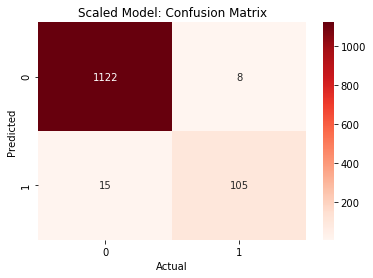

In [33]:
# Create the confusion matrix (cm)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(cm,
            cmap = 'Reds', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("Scaled Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

#### 3. Classification Report

In [34]:
# Classification report title print statement 
print("Scaled Classification Report:")

# Create the classification report
scaled_report = classification_report(y_test, y_pred)

# Print the classification report
print(scaled_report)

Scaled Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.93      0.88      0.90       120

    accuracy                           0.98      1250
   macro avg       0.96      0.93      0.95      1250
weighted avg       0.98      0.98      0.98      1250



#### 4. F-Beta Score

In [35]:
# Calculate Beta F1 Score
fbeta_scale = fbeta_score(y_test, y_pred,beta=0.5)

# Print the F1 score results
print("F1 Beta Score: %f" % (fbeta_scale))

F1 Beta Score: 0.917832


#### 5. ROC - AUC

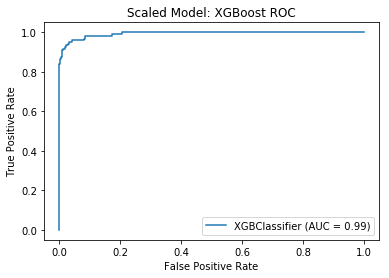

Scaled Model: ROC-AUC Score: 0.9339601769911504


In [36]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)
roc_auc_scale = roc_auc_score(y_test, y_pred)

# Set plot labels
plt.title("Scaled Model: XGBoost ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("Scaled Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred))

#### 6. Feature Importance

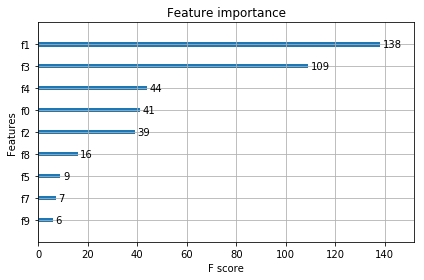

In [37]:
# Create the plot importance model
plot_importance(model)

# Display the plot
plt.tight_layout()
plt.savefig('images/xgb_feat_scale.png')
plt.show()

In [38]:
# Display the features dataframe for ylabel reference purposes
features

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


**Y Label Reference:**

To identify the feature importance titles, refere to the features dataframe.

In [39]:
# Export model for load to dashboard
dump(model, 'models/xgb_scaled_model.joblib')

['models/xgb_scaled_model.joblib']

---

### XGBoost Model: SMOTE Dataset

Now that the XGBoost Classifier model has pre-determined optimized hyper-paramters, the results can be applied to training and testing the SMOTE dataset.

**To evaluate the model the following metrics will be applied:**

1. Balanced Accuracy Score & Accuracy Score
2. Confusion Matrix
3. Classification Report 
4. F-Beta Score
5. ROC - AUC
6. Feature Importance 

#### Set the Model

In [40]:
# Set the model variable & the hyperparameters based on the 'best estimator' results
model = XGBClassifier(booster='dart', 
                      colsample_bytree=0.7, 
                      learning_rate=0.15,
                      max_depth=18, 
                      min_child_weight=7, 
                      reg_lambda=1.0,
                      subsample=0.6)

In [41]:
# Fit the SMOTE dataset to the model 
model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Prediction

In [42]:
# Set a predict model
y_pred_smote = model.predict(X_test_scaled)

# Display the variable
y_pred_smote

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
# Create a dataframe containing the y_pred results
results = pd.DataFrame({"Prediction": y_pred_smote, "Actual": y_test}).reset_index(drop=True)

# Display the dataframe
results.tail()

,Prediction,Actual
1245,0,0
1246,1,1
1247,0,0
1248,0,0
1249,0,0


### SMOTE Model Evaluation: 

#### 1. Balanced Accuracy Score & Accuracy Score

In [44]:
# Evaluate the predict model through the Balanced Accuracy Score metric
bas_smote = balanced_accuracy_score(y_test, y_pred_smote)

# Evaluate the predict model through the Accuracy Score metric
as_smote = accuracy_score(y_test, y_pred_smote)

# Print the evaluation results
print(f"SMOTE XGB Classifier Balanced Accuracy Score Model is: {bas_smote}")
print(f"SMOTE XGB Classifier Accuracy Score Model is: {as_smote}")

SMOTE XGB Classifier Balanced Accuracy Score Model is: 0.9594026548672567
SMOTE XGB Classifier Accuracy Score Model is: 0.9872


#### 2. Confusion Matrix

Text(33.0, 0.5, 'Predicted')

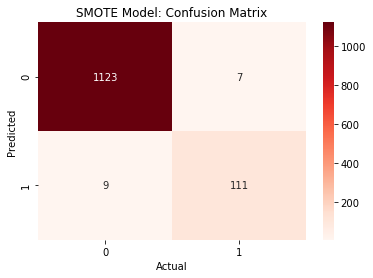

In [45]:
# Create the confusion matrix (cm)
cm = confusion_matrix(y_test, y_pred_smote)

# Display the confusion matrix
sns.heatmap(cm,
            cmap = 'Reds', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("SMOTE Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

#### 3. Classification Report

In [46]:
# Classification report title print statement 
print("SMOTE Classification Report:")

# Create the classification report
smote_report = classification_report(y_test, y_pred_smote)

# Print the classification report
print(smote_report)

SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.94      0.93      0.93       120

    accuracy                           0.99      1250
   macro avg       0.97      0.96      0.96      1250
weighted avg       0.99      0.99      0.99      1250



#### 4. F-Beta Score

In [47]:
# Calculate Beta F1 Score
fbeta_smote = fbeta_score(y_test, y_pred_smote,beta=0.5)

# Print the F1 score results
print("F1 Beta Score: %f" % (fbeta_smote))

F1 Beta Score: 0.937500


#### 5. ROC - AUC

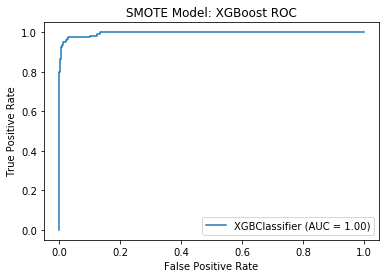

SMOTE Model: ROC-AUC Score: 0.9594026548672567


In [48]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)

# Set plot labels
plt.title("SMOTE Model: XGBoost ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("SMOTE Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred_smote))

#### 6. Feature Importance

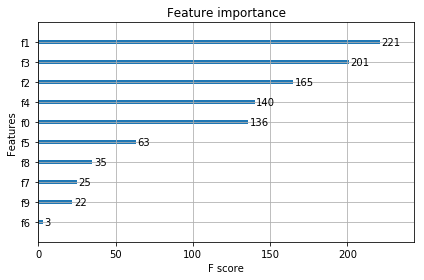

In [49]:
# Create the plot importance model
plot_importance(model)

# Display the plot
plt.tight_layout()
plt.savefig('images/xgb_feat_smote.png')
plt.show()

In [50]:
# Display the features dataframe for ylabel reference purposes
features

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


**Y Label Reference:**

To identify the feature importance titles, refere to the features dataframe.

In [51]:
# Export model for load to dashboard
dump(model, 'models/xgb_smote_model.joblib')

['models/xgb_smote_model.joblib']

---

### XGBoost Model: Random Over Sampled (ROS) Dataset

Applying the optimized hyper-parameters determined in the second part of the notebook for the GXBoost Classifier model, the random over sampled (ROS) dataset will be evaluated through training and testing data. 

**To evaluate the model the following metrics will be applied:**

1. Balanced Accuracy Score & Accuracy Score
2. Confusion Matrix
3. Classification Report 
4. F-Beta Score
5. ROC - AUC
6. Feature Importance 

#### Set the Model

In [52]:
# Set the model variable & the hyperparameters based on the 'best estimator' results
model = XGBClassifier(booster='dart', 
                      colsample_bytree=0.7, 
                      learning_rate=0.15,max_depth=18, 
                      min_child_weight=7,  
                      reg_lambda=1.0,
                      subsample=0.6)

In [53]:
# Fit the ROS dataset to the model 
model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Prediction

In [54]:
# Set a predict model
y_pred_ros = model.predict(X_test_scaled)

# Display the variable
y_pred_ros

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
# Create a dataframe containing the y_pred results
results = pd.DataFrame({"Prediction": y_pred_ros, "Actual": y_test}).reset_index(drop=True)

# Display the dataframe
results.tail()

,Prediction,Actual
1245,0,0
1246,1,1
1247,0,0
1248,0,0
1249,0,0


### ROS Model Evaluation: 

#### 1. Balanced Accuracy Score & Accuracy Score

In [56]:
# Evaluate the predict model through the Balanced Accuracy Score metric
bas_ros = balanced_accuracy_score(y_test, y_pred_ros)

# Evaluate the predict model through the Accuracy Score metric
as_ros = accuracy_score(y_test, y_pred_ros)

# Print the evaluation results
print(f"ROS XGB Classifier Balanced Accuracy Score Model is: {bas_ros}")
print(f"ROS XGB Classifier Accuracy Score Model is: {as_ros}")

ROS XGB Classifier Balanced Accuracy Score Model is: 0.9720870206489676
ROS XGB Classifier Accuracy Score Model is: 0.9832


#### 2. Confusion Matrix

Text(33.0, 0.5, 'Predicted')

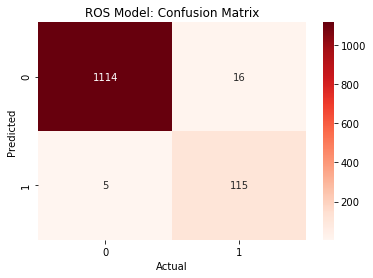

In [57]:
# Create the confusion matrix (cm)
cm = confusion_matrix(y_test, y_pred_ros)

# Display the confusion matrix
sns.heatmap(cm,
            cmap = 'Reds', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("ROS Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

#### 3. Classification Report

In [58]:
# Classification report title print statement 
print("ROS Classification Report:")

# Create the classification report
ros_report = classification_report(y_test, y_pred_ros)

# Print the classification report
print(ros_report)

ROS Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1130
           1       0.88      0.96      0.92       120

    accuracy                           0.98      1250
   macro avg       0.94      0.97      0.95      1250
weighted avg       0.98      0.98      0.98      1250



#### 4. F-Beta Score

In [59]:
# Calculate Beta F1 Score
fbeta_ros = fbeta_score(y_test, y_pred_ros,beta=0.5)

# Print the F1 score results
print("F1 Beta Score: %f" % (fbeta_ros))

F1 Beta Score: 0.892857


#### 5. ROC - AUC

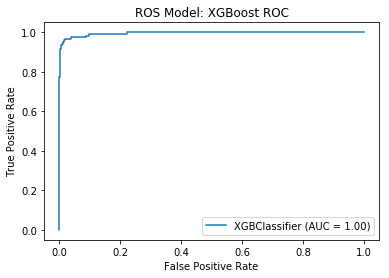

ROS Model: ROC-AUC Score: 0.9720870206489676


In [60]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)
roc_auc_ros = roc_auc_score(y_test, y_pred_ros)

# Set plot labels
plt.title("ROS Model: XGBoost ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("ROS Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred_ros))

#### 6. Feature Importance

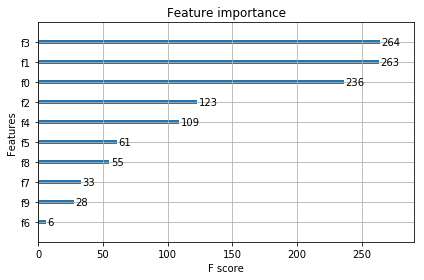

In [61]:
# Create the plot importance model
plot_importance(model)

# Display the plot
plt.tight_layout()
plt.savefig('images/xgb_feat_ros.png')
plt.show()

In [62]:
# Display the features dataframe for ylabel reference purposes
features

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


**Y Label Reference:**

To identify the feature importance titles, refere to the features dataframe.

In [63]:
# Export model for load to dashboard
dump(model, 'models/xgb_ros_model.joblib')

['models/xgb_ros_model.joblib']

---

### XGBoost: Model Comparison & Conclusions

#### Accuracy Scores

In [64]:
# Create the model accuracy scores dataframe
accuracy_scores = pd.DataFrame({
    "Model Dataset" : ["Scaled Balanced Accuracy Score", 
                       "Scaled Accuracy Score", 
                       "SMOTE Balanced Accuracy Score", 
                       "SMOTE Accuracy Score", 
                       "ROS Balanced Accuracy Score", 
                       "ROS Accuracy Score"],
    "Score" : [bas_scale, as_scale, bas_smote, as_smote, bas_ros, as_ros]
})

# Display the dataframe
accuracy_scores

,Model Dataset,Score
0,Scaled Balanced Accuracy Score,0.933960
1,Scaled Accuracy Score,0.981600
2,SMOTE Balanced Accuracy Score,0.959403
3,SMOTE Accuracy Score,0.987200
4,ROS Balanced Accuracy Score,0.972087
5,ROS Accuracy Score,0.983200


##### Balanced Accuracy & Accuracy Score Conclusions: 

Based on an equal weighting of model accuracy and balanced accuracy score, the model that produces more effective scores in compared to the other results is the Random Oversampled (ROS) XGBoost model. 

**Random Oversampled XGBoost Model:**

* Balanced Accuracy Score: 97.70
* Accuracy Score: 98.72

#### Classification Reports

In [65]:
# Scaled Mode:
print("Scaled Classification Report:")
print(scaled_report)

# SMOTE Model:
print("SMOTE Classification Report:")
print(smote_report)

# ROS Model:
print("ROS Classification Report:")
print(ros_report)

Scaled Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.93      0.88      0.90       120

    accuracy                           0.98      1250
   macro avg       0.96      0.93      0.95      1250
weighted avg       0.98      0.98      0.98      1250

SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.94      0.93      0.93       120

    accuracy                           0.99      1250
   macro avg       0.97      0.96      0.96      1250
weighted avg       0.99      0.99      0.99      1250

ROS Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1130
           1       0.88      0.96      0.92       120

    accuracy                           0.98      1250
   macro avg       0.94      0.97      0.9

##### Classification Report Conclusions: 

Based on the project objective, the null hypothesis scores are evaluated to determine which model performs the best in regards to the following three metrics; 

**Precision:** ROS XGBoost model

**Recall:** Each model performs at 0.99

**F1-Score:** Each model performs at 0.99

#### F1 Scores & F-Beta Scores

In [66]:
# Create the model for F1 Scores & F1 Beta Scores dataframe
f_scores = pd.DataFrame({
    "Model Dataset" : ["Scaled F1 Beta",  
                       "SMOTE F1 Beta", 
                       "ROS F1 Beta"], 
    "Score" : [fbeta_scale, fbeta_smote, fbeta_ros]
})

# Display the dataframe
f_scores

,Model Dataset,Score
0,Scaled F1 Beta,0.917832
1,SMOTE F1 Beta,0.937500
2,ROS F1 Beta,0.892857


##### F-Beta Scores Conclusions:

In regards to the project objective, *determining a model that has optimal predictive abilities to determine the liklihood an account holder at Thera Bank is to take out a personal loan*, placing a greater weight on recall rather than equal weight to preicsion and recall is required. 

Weighted F1 scores place a greater weight on recall, thus the model with a higher F-Beta score is the Scaled XGBoost model.

**Scaled XGBoost Result:** 94.19

#### ROC - AUC

In [67]:
# Create the model ROC-AUC dataframe
roc_auc_scores = pd.DataFrame({
    "Model Dataset" : ["Scaled ROC-AUC", 
                       "SMOTE ROC-AUC", 
                       "ROS ROC-AUC"], 
    "Score" : [roc_auc_scale, roc_auc_smote, roc_auc_ros]
})

# Display the dataframe
roc_auc_scores

,Model Dataset,Score
0,Scaled ROC-AUC,0.933960
1,SMOTE ROC-AUC,0.959403
2,ROS ROC-AUC,0.972087


##### ROC-AUC Conclusions:

Of the three trained datasets, the XGBoost model that provides the best results for the ROC-AUC is the Random Oversampled (ROS) model. 

**Random Oversampled XGBoost Model:**

* ROC-AUC : 97.21


### Final Analysis:

The purpose of the model is to provide optimized predictions regarding a Thera Bank account holder's likelihood of taking out a personal loan. In the original dataset, the promotion campaign Thera Bank employed to increase the amount of customers with a personal loan indicated many account holders were liability customers (i.e. dispositors). The goal of the campaign is to increase the amount of asset customers (i.e. borrowers). Therefore, our model places greater emphasis on recall, as there is a significantly lower percentage of asset customers in relation to liability customers. 

Thus, understanding the principle of the data is highly important in identifying the evaluation metrics that are best suited to measure the XGBoost's model performance. Recall has the ability to best identify the samples that were classified correctly, minimizing the potential for false negatives. Due to the fact Thera Bank is greatly interested in growing their consumer base, a model that identifies account holders as customers that did take out a personal loan when in fact, they did not would skew the data. Therefore, mitigating the risk for potential error is a key factor in selecting the final model. 

Therefore, model recall and model F-Beta scores are the key evaluation metrics analyzed in determining which trained and tested dataset predictions are best to use. Additionally, to ensure all model features have an optimal performance precision and accuracy score are evaluated as secondary conditions. *The determined model to use is based on a comparison of all characteristics. This is an important note because the three models produce a good recall score.*

**Model Selected:** Random Oversampled (ROS) XGBoost Model 

* Recall: 99%
* Weighted F1 Score: 91.77
* Accuracy Score: 98.32
* Balanced Accuracy Score: 97.70
* ROC-AUC: 97.20

---